In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
(train_data,train_labels),(test_data,test_labels)=keras.datasets.reuters.load_data(num_words=10000)

In [3]:
train_data.shape

(8982,)

In [4]:
train_labels.shape

(8982,)

In [5]:
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results


In [6]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [7]:
ome_hot_train_labels=keras.utils.to_categorical(train_labels)
ome_hot_test_labels=keras.utils.to_categorical(test_labels)

In [8]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(46,activation='softmax'))

In [9]:
model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
             metrics=['acc'])

In [10]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=ome_hot_train_labels[:1000]
partial_y_train=ome_hot_train_labels[1000:]

In [11]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 224us/sample - loss: 3.4001 - acc: 0.3839 - val_loss: 2.7310 - val_acc: 0.5470
Epoch 2/20
7982/7982 [==============================] - 1s 120us/sample - loss: 2.1650 - acc: 0.5869 - val_loss: 1.6990 - val_acc: 0.6280
Epoch 3/20
7982/7982 [==============================] - 1s 121us/sample - loss: 1.4030 - acc: 0.7003 - val_loss: 1.3180 - val_acc: 0.7070
Epoch 4/20
7982/7982 [==============================] - 1s 123us/sample - loss: 1.0477 - acc: 0.7751 - val_loss: 1.1493 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 122us/sample - loss: 0.8134 - acc: 0.8257 - val_loss: 1.0481 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 1s 124us/sample - loss: 0.6335 - acc: 0.8666 - val_loss: 0.9814 - val_acc: 0.8000
Epoch 7/20
7982/7982 [==============================] - 1s 124us/sample - loss: 0.4894 - acc: 0.9000 - val_loss: 0.9330 - va

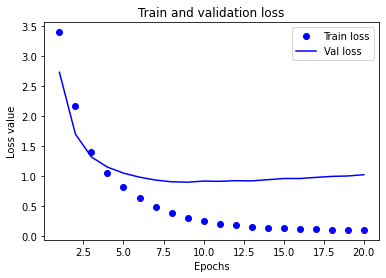

In [16]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Train loss')
plt.plot(epochs,val_loss,'b',label='Val loss')
plt.title('Train and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.legend()
plt.show()

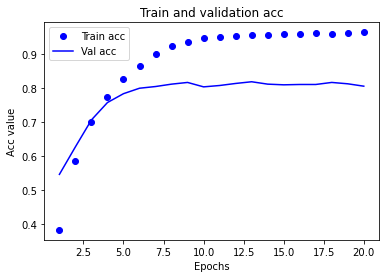

In [18]:
train_acc=history.history['acc']
val_acc=history.history['val_acc']
epochs=range(1,len(loss)+1)
plt.plot(epochs,train_acc,'bo',label='Train acc')
plt.plot(epochs,val_acc,'b',label='Val acc')
plt.title('Train and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc value')
plt.legend()

In [20]:
results=model.evaluate(x_test,ome_hot_test_labels)

2246/2246 [==============================] - 0s 185us/sample - loss: 1.0913 - acc: 0.7907
